In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


In [4]:
# Load the data
data = pd.read_excel('world_population.xlsx')

# Display the first few rows of the dataframe
data.head()


,Year,Population
0,1960,3031474234
1,1961,3072421801
2,1962,3126849612
3,1963,3193428894
4,1964,3260441925


In [5]:
# Extract features and target variable
X = data['Year'].values.reshape(-1, 1)
y = data['Population'].values


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Predict the population for the test set
y_pred = model.predict(X_test)


In [9]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Evaluation Metrics:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')


Evaluation Metrics:
Mean Squared Error (MSE): 3205141822480447.00
Root Mean Squared Error (RMSE): 56613971.97
Mean Absolute Error (MAE): 38110112.77
R-squared (R²): 1.00


In [10]:
# Predict the population for the year 2030
year_2030 = np.array([[2030]])
population_2030 = model.predict(year_2030)
print(f'\nPredicted world population in 2030: {population_2030[0]:.2f}')



Predicted world population in 2030: 8594888229.79


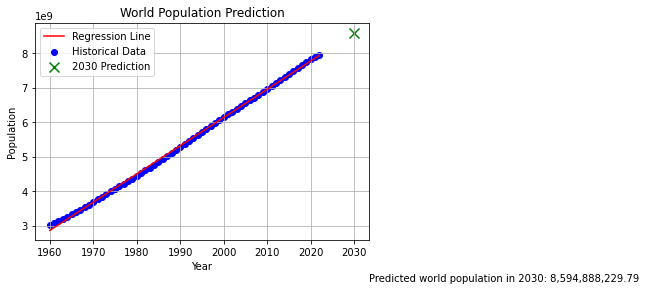

In [11]:
# Plot the historical data and the prediction
plt.scatter(X, y, color='blue', label='Historical Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(year_2030, population_2030, color='green', marker='x', s=100, label='2030 Prediction')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.title('World Population Prediction')
plt.grid(True)

# Add text for the predicted world population in 2030
plt.text(1.0, -0.2, f'Predicted world population in 2030: {population_2030[0]:,.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom')
plt.show()


In [12]:
# Save the trained model to a file
joblib.dump(model, 'population_model.pkl')


['population_model.pkl']